In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
apple_stock_data = pd.read_csv('apple.csv')
apple_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-29,29.080000,29.797501,28.889999,29.725000,26.912094,337745600
1,2015-01-30,29.600000,30.000000,29.212500,29.290001,26.518257,334982000
2,2015-02-02,29.512501,29.792500,29.020000,29.657499,26.850977,250956400
3,2015-02-03,29.625000,29.772499,29.402500,29.662500,26.855511,207662800
4,2015-02-04,29.625000,30.127501,29.577499,29.889999,27.061480,280598800


In [9]:
apple_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1764 non-null   object 
 1   Open       1764 non-null   float64
 2   High       1764 non-null   float64
 3   Low        1764 non-null   float64
 4   Close      1764 non-null   float64
 5   Adj Close  1764 non-null   float64
 6   Volume     1764 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 96.6+ KB


In [10]:
apple_stock_data = apple_stock_data[['Date','Open','Close']] # Extracting required columns
apple_stock_data['Date'] = pd.to_datetime(apple_stock_data['Date'].apply(lambda x: x.split()[0])) # Selecting only date
apple_stock_data.set_index('Date',drop=True,inplace=True) # Setting date column as index
apple_stock_data.head()

,Open,Close
Date,,
2015-01-29,29.080000,29.725000
2015-01-30,29.600000,29.290001
2015-02-02,29.512501,29.657499
2015-02-03,29.625000,29.662500
2015-02-04,29.625000,29.889999


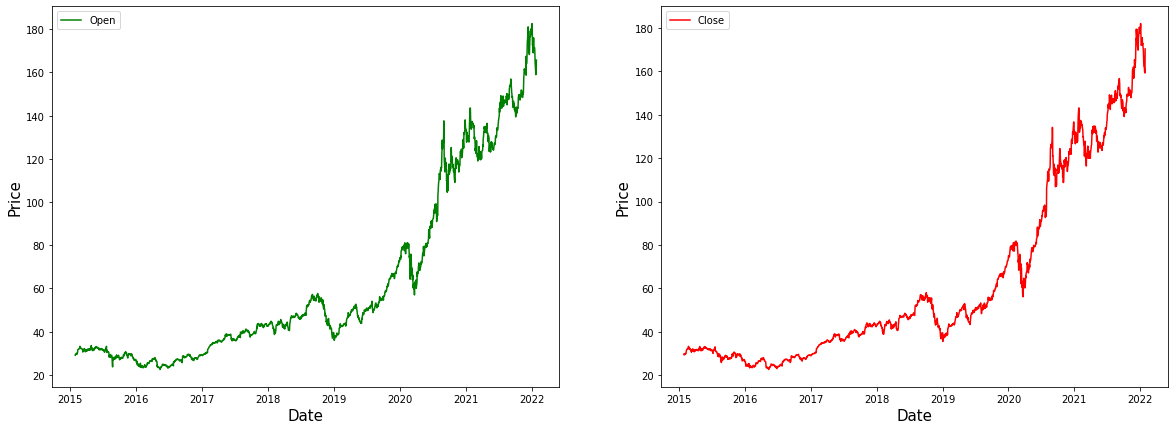

In [11]:
fg, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(apple_stock_data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(apple_stock_data['Close'],label='Close',color='red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fg.show()

# Data Pre-Processing

In [12]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
apple_stock_data[apple_stock_data.columns] = MMS.fit_transform(apple_stock_data)

In [13]:
apple_stock_data.shape

(1764, 2)

In [14]:
training_size = round(len(apple_stock_data) * 0.80) # Selecting 80 % for training and 20 % for testing
training_size

1411

In [15]:
train_data = apple_stock_data[:training_size]
test_data  = apple_stock_data[training_size:]

train_data.shape, test_data.shape

((1411, 2), (353, 2))

In [16]:
# Function to create sequence of data for training and testing

def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(50,len(dataset)): # Selecting 50 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1
  return (np.array(sequences),np.array(labels))


In [17]:
train_seq, train_label = create_sequence(train_data)
test_seq, test_label = create_sequence(test_data)

In [18]:
train_seq.shape, train_label.shape, test_seq.shape, test_label.shape

((1361, 50, 2), (1361, 2), (303, 50, 2), (303, 2))

# Creating LSTM model

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [43]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_seq.shape[1], train_seq.shape[2])))

model.add(Dropout(0.1)) 
model.add(LSTM(units=50))

model.add(Dense(2))

model.compile(loss='mean_squared_error', optimizer='adam',metrics=['mean_squared_error'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 50, 50)            10600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50, 50)            0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
Total params: 30,902
Trainable params: 30,902
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.fit(train_seq, train_label, epochs=100,validation_data=(test_seq, test_label), verbose=1)

Epoch 1/100
43/43 [==============================] - 17s 103ms/step - loss: 0.0042 - mean_squared_error: 0.0042 - val_loss: 0.0242 - val_mean_squared_error: 0.0242
Epoch 2/100
43/43 [==============================] - 2s 51ms/step - loss: 2.6692e-04 - mean_squared_error: 2.6692e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 3/100
43/43 [==============================] - 2s 51ms/step - loss: 2.3439e-04 - mean_squared_error: 2.3439e-04 - val_loss: 0.0047 - val_mean_squared_error: 0.0047
Epoch 4/100
43/43 [==============================] - 2s 52ms/step - loss: 2.1688e-04 - mean_squared_error: 2.1688e-04 - val_loss: 0.0016 - val_mean_squared_error: 0.0016
Epoch 5/100
43/43 [==============================] - 2s 50ms/step - loss: 2.0627e-04 - mean_squared_error: 2.0627e-04 - val_loss: 0.0013 - val_mean_squared_error: 0.0013
Epoch 6/100
43/43 [==============================] - 2s 46ms/step - loss: 2.0951e-04 - mean_squared_error: 2.0951e-04 - val_loss: 0.0029 - val_mean_squared_

Epoch 48/100
43/43 [==============================] - 2s 50ms/step - loss: 1.0115e-04 - mean_squared_error: 1.0115e-04 - val_loss: 3.7121e-04 - val_mean_squared_error: 3.7121e-04
Epoch 49/100
43/43 [==============================] - 2s 50ms/step - loss: 9.3969e-05 - mean_squared_error: 9.3969e-05 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 50/100
43/43 [==============================] - 2s 50ms/step - loss: 1.0159e-04 - mean_squared_error: 1.0159e-04 - val_loss: 4.0785e-04 - val_mean_squared_error: 4.0785e-04
Epoch 51/100
43/43 [==============================] - 2s 50ms/step - loss: 1.0092e-04 - mean_squared_error: 1.0092e-04 - val_loss: 4.8328e-04 - val_mean_squared_error: 4.8328e-04
Epoch 52/100
43/43 [==============================] - 2s 50ms/step - loss: 1.0612e-04 - mean_squared_error: 1.0612e-04 - val_loss: 4.2249e-04 - val_mean_squared_error: 4.2249e-04
Epoch 53/100
43/43 [==============================] - 2s 50ms/step - loss: 1.1636e-04 - mean_squared_error: 1.163

43/43 [==============================] - 2s 50ms/step - loss: 7.6474e-05 - mean_squared_error: 7.6474e-05 - val_loss: 3.8348e-04 - val_mean_squared_error: 3.8348e-04
Epoch 95/100
43/43 [==============================] - 2s 50ms/step - loss: 7.5018e-05 - mean_squared_error: 7.5018e-05 - val_loss: 8.9812e-04 - val_mean_squared_error: 8.9812e-04
Epoch 96/100
43/43 [==============================] - 2s 51ms/step - loss: 6.8730e-05 - mean_squared_error: 6.8730e-05 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 97/100
43/43 [==============================] - 2s 49ms/step - loss: 6.4983e-05 - mean_squared_error: 6.4983e-05 - val_loss: 5.1104e-04 - val_mean_squared_error: 5.1104e-04
Epoch 98/100
43/43 [==============================] - 2s 49ms/step - loss: 8.1687e-05 - mean_squared_error: 8.1687e-05 - val_loss: 2.6976e-04 - val_mean_squared_error: 2.6976e-04
Epoch 99/100
43/43 [==============================] - 2s 50ms/step - loss: 5.6297e-05 - mean_squared_error: 5.6297e-05 - val_l

In [45]:
test_predicted = model.predict(test_seq)
test_predicted[:5]

array([[0.6194497 , 0.6254321 ],
       [0.6229727 , 0.6288068 ],
       [0.62248576, 0.6286058 ],
       [0.6173551 , 0.624039  ],
       [0.61637396, 0.6228011 ]], dtype=float32)

In [46]:
test_inverse_predicted = MMS.inverse_transform(test_predicted) # Inversing scaling on predicted data
test_inverse_predicted[:5]

array([[121.69248, 122.2945 ],
       [122.25663, 122.83252],
       [122.17865, 122.80047],
       [121.35708, 122.07241],
       [121.19997, 121.87506]], dtype=float32)

# Visualizing predicted and actual data

In [47]:
# Merging actual and predicted data for better visualization

gs_slic_data = pd.concat([apple_stock_data.iloc[-303:].copy(),pd.DataFrame(test_inverse_predicted,columns=['open_predicted','close_predicted'],index=apple_stock_data.iloc[-303:].index)], axis=1)

In [48]:
gs_slic_data[['Open','Close']] = MMS.inverse_transform(gs_slic_data[['Open','Close']]) # Inverse scaling

In [49]:
gs_slic_data.head()

,Open,Close,open_predicted,close_predicted
Date,,,,
2020-11-16,118.919998,120.300003,121.692482,122.294502
2020-11-17,119.550003,119.389999,122.256630,122.832520
2020-11-18,118.610001,118.029999,122.178650,122.800468
2020-11-19,117.589996,118.639999,121.357079,122.072411
2020-11-20,118.639999,117.339996,121.199966,121.875061


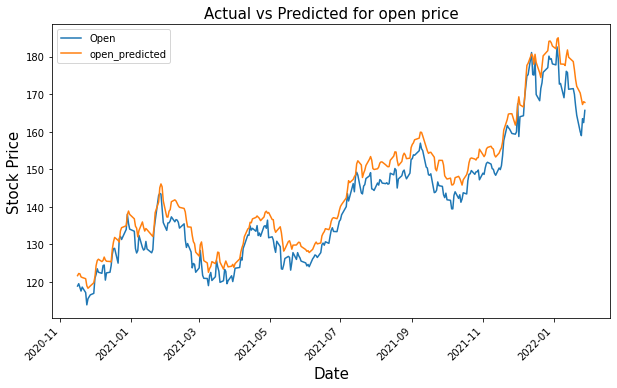

In [50]:
gs_slic_data[['Open','open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

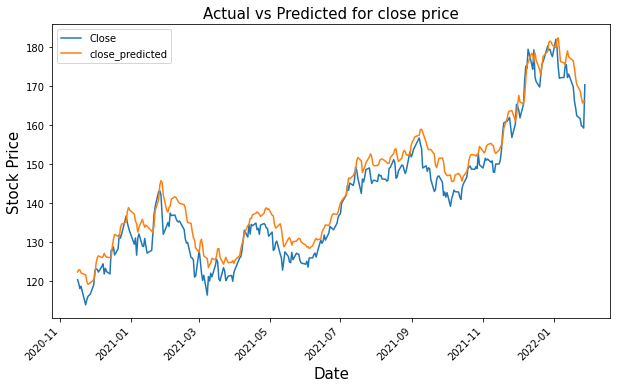

In [51]:
gs_slic_data[['Close','close_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

# Predicting upcoming 10 days

In [52]:
# Creating a dataframe and adding 10 days to existing index 

gs_slic_data = gs_slic_data.append(pd.DataFrame(columns=gs_slic_data.columns,index=pd.date_range(start=gs_slic_data.index[-1], periods=11, freq='D', closed='right')))


In [53]:
gs_slic_data['2022-01-23':'2022-01-28']

,Open,Close,open_predicted,close_predicted
2022-01-24,160.020004,161.619995,170.340286,168.666840
2022-01-25,158.979996,159.779999,168.763840,167.104614
2022-01-26,163.500000,159.690002,167.269424,165.638535
2022-01-27,162.449997,159.220001,168.032562,166.175659
2022-01-28,165.710007,170.330002,167.828705,165.997253


In [54]:
upcoming_prediction = pd.DataFrame(columns=['Open','Close'],index=gs_slic_data.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [55]:
curr_seq = test_seq[-1:]

for i in range(-10,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(test_seq[-1:].shape)


In [56]:
upcoming_prediction[['Open','Close']] = MMS.inverse_transform(upcoming_prediction[['Open','Close']])

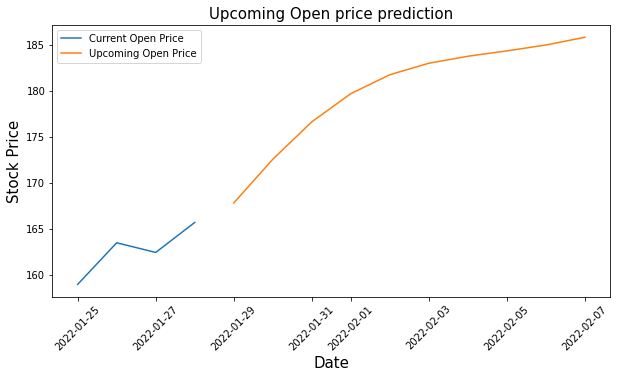

In [57]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2022-01-25':,'Open'],label='Current Open Price')
ax.plot(upcoming_prediction.loc['2022-01-25':,'Open'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Open price prediction',size=15)
ax.legend()
fg.show()

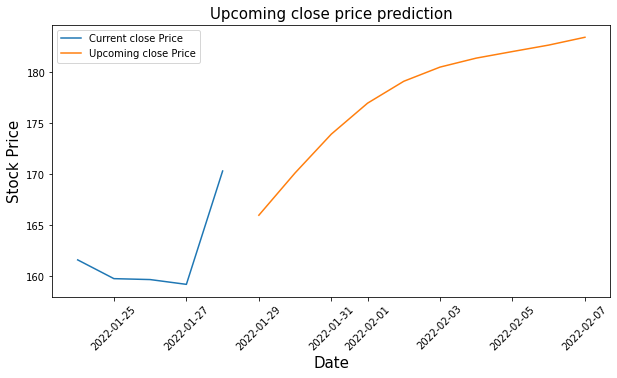

In [58]:
fg,ax=plt.subplots(figsize=(10,5))
ax.plot(gs_slic_data.loc['2022-01-24':,'Close'],label='Current close Price')
ax.plot(upcoming_prediction.loc['2022-01-24':,'Close'],label='Upcoming close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming close price prediction',size=15)
ax.legend()
fg.show()